## 3. Robintrack - some analysis on users/tickers 
    

In [27]:
# Import libraries and dependencies
import os
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from dotenv import load_dotenv

#import numpy as np
#from MCForecastTools import MCSimulation

%matplotlib inline

In [6]:
# Load .env enviroment variables
load_dotenv()

True

### The objective is to read al the CVS files for all tickers and determine the number of users un August 2020
#### • Then select the tickers with the largest number of users. 
#### • As a first example the number of tickers con mas de 250k inversores


In [15]:
# This function read the csvfile into a datframe and gets the number of users for the ticker with has to be higher than a target (min_users)

def read_data(raw_csv, min_users):
    
    # Read in csv 
    try:
        df_new_csv = pd.read_csv (raw_csv)  

    except Exception as err:
        print(f'Other error occurred: {err}')  
        return
    else:
        print('.', end = '')

    if df_new_csv.iloc[-1,-1] > min_users:
        print (f'\nticker: {raw_csv[-8:-1]}, number of users = {df_new_csv.iloc[-1,-1]}') 
        return df_new_csv.iloc[-1,-1]


### This main scrip sets the target of users and select all csv in all folders to be analyzed

In [16]:
# Citation: https://pandasninja.com/2019/04/how-to-read-lots-of-csv-files-easily-into-pandas/


# Create and empty DataFrame for most popular tickers 
df_popularity = pd.DataFrame()
min_users = 250000
num_tickers_total = 0

raw_folders = os.listdir('../data/rawdata_robin_all')
for folder in raw_folders:
    raw_csvs = os.listdir(f'../data/rawdata_robin_all/{folder}')
    for raw_csv in raw_csvs:
        raw_csv = f'../data/rawdata_robin_all/{folder}/{raw_csv}'
        number_users = read_data(raw_csv, min_users)
        num_tickers_total += 1
        if number_users:
            df_popularity = df_popularity.append({'ticker' : raw_csv[-8:-1], 'users' : number_users}, ignore_index = True) 

print ('\n\nend of dir loop')
print (f'\n total number of csv files (tickers) = {num_tickers_total}')

..........................................
ticker: /UAL.cs, number of users = 311457
...............................................................................................................................................
ticker: t/BA.cs, number of users = 320552
.........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [12]:
df_popularity.describe()

,users
count,24.000000
mean,463684.000000
std,188964.976707
min,254208.000000
25%,322647.500000
50%,407697.000000
75%,579101.000000
max,911470.000000


In [18]:
df_popularity.sort_values('users', axis=0, ascending=True, inplace=False)

,ticker,users
9,t/FB.cs,254208.0
21,BABA.cs,255110.0
8,/AMD.cs,264849.0
13,/NIO.cs,268353.0
0,/UAL.cs,311457.0
1,t/BA.cs,320552.0
16,/FIT.cs,323346.0
14,MRNA.cs,339461.0
4,SNAP.cs,350278.0
22,NCLH.cs,353071.0


In [149]:
x = '../data/rawdata_robin_all/popularity_export/F.csv'
x[-8:-1]

'rt/F.cs'

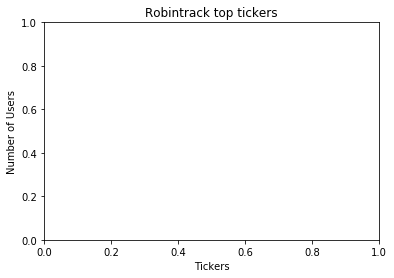

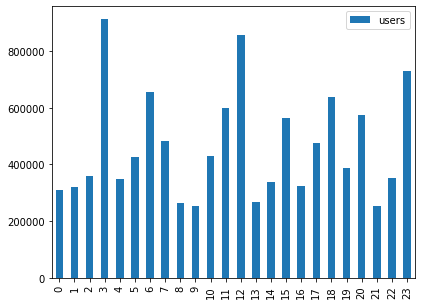

In [31]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.
# Optional Challenge: Use the min, max, and std to scale the y limits of the chart

plt.xlabel('Tickers')
plt.ylabel('Number of Users')
plt.title(f'Robintrack top tickers')
#plt.xlim(2010, 2016)
#plt.ylim((housing_units.min()-housing_units.std()), (housing_units.max()+housing_units.std()))
#housing_units.plot.bar(figsize=(6.5, 5)).get_figure().savefig('./Images/housing_units_bar') # --> save plot into a file as well
df_popularity[['users', 'ticker']].plot.bar(figsize=(6.5, 5))  # only on the screen 

In [19]:
# export top ticks  to csv
df_popularity.to_csv(r'../data/cleandata/Processed_Data/df_popularity.csv', index = False)